---->pandas is imported to handle and analyze data efficiently in tables (DataFrames).
numpy is used for numerical operations and handling arrays.
seaborn is imported for creating attractive and informative statistical graphics.
matplotlib.pyplot is imported to generate basic plots and charts to visualize the data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

-->Load water potability data into a DataFrame

In [ ]:
dataset=pd.read_csv('/content/water_potability (1).csv')

-->Display summary info about dataset columns and missing data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


 -->Remove rows with any missing values

-->Count missing values in each column

In [ ]:
dataset.isnull().sum()
dataset.dropna(inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


-->We use boxplots to see how each feature’s values are spread and to find any unusual values (outliers) that might affect our model.

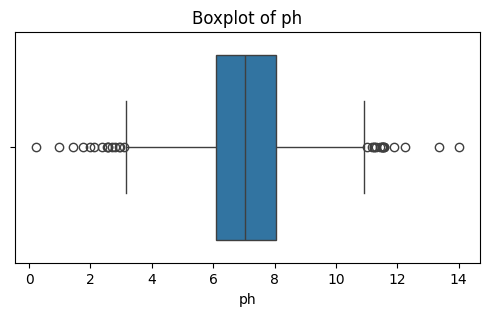

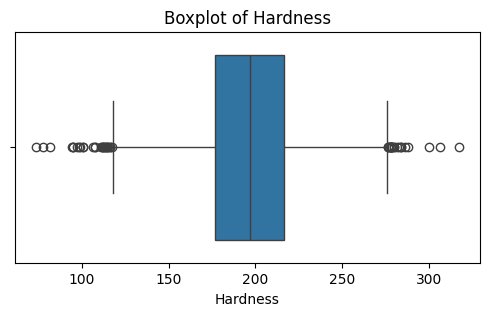

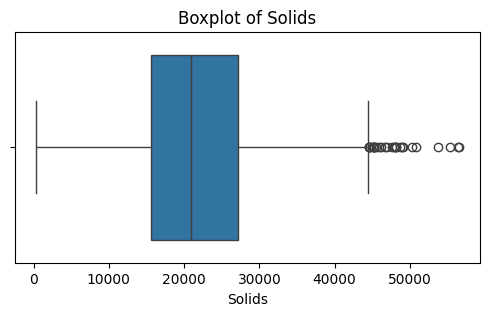

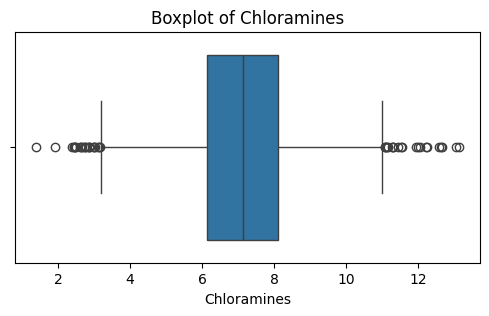

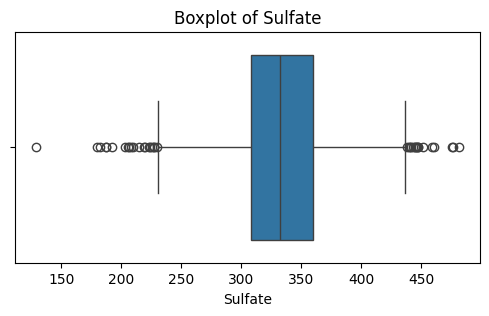

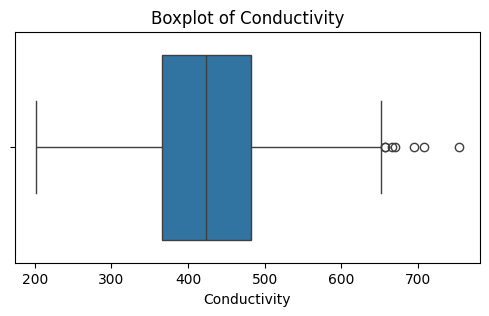

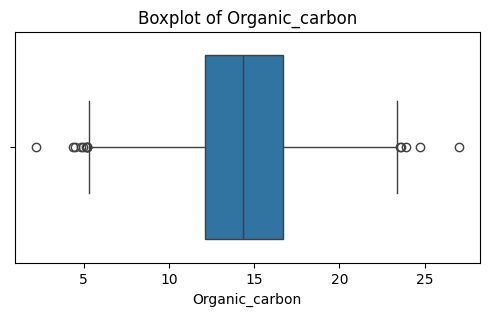

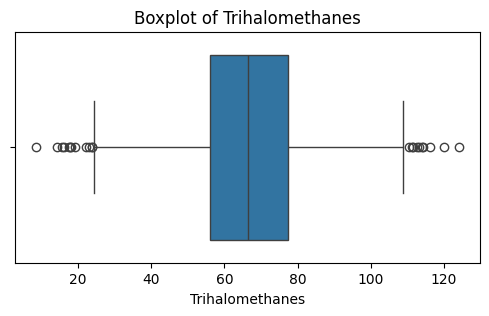

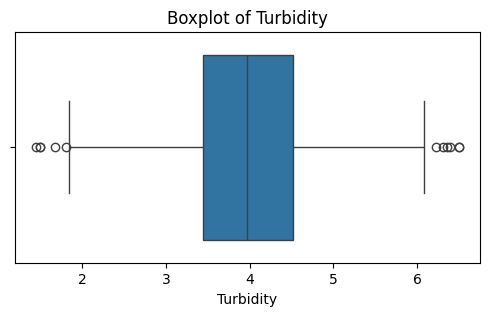

In [ ]:
for column in dataset.columns[:-1]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=dataset, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

-->We use a heatmap to see how strongly the features are related to each other, which helps us understand the data better and choose important features for the model.

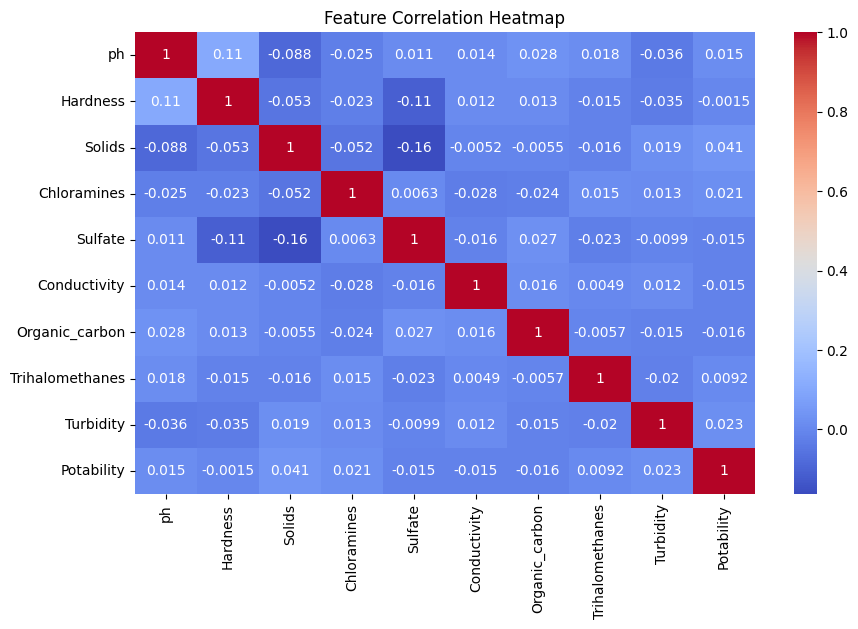

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

-->We select important water quality features as input variables (X) and the ‘Potability’ column as the output label (y) for training our model.

In [ ]:
x=dataset[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y=dataset[['Potability']]

-->We split the data into training and testing sets — 80% for training the model and 20% for testing its performance — to evaluate how well the model generalizes to new data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

-->Displaying the training and testing data

In [ ]:
x_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
501,5.842933,168.295287,19156.123132,6.878348,331.477649,506.756808,14.526151,80.423715,4.143225
503,5.345887,184.784575,22274.368372,9.727103,319.030495,492.135489,11.894673,87.297686,2.950361
1508,7.958871,184.828557,26845.661013,7.673719,327.239109,389.264216,11.032867,52.510520,4.007903
917,7.592672,177.080839,14912.225506,6.041144,349.240614,355.284442,17.161966,42.115257,3.341427
1435,5.198225,173.119821,11178.403544,5.893458,343.209876,390.065616,14.160899,65.433008,3.807318


In [ ]:
y_test.head()

,Potability
1834,0
2428,1
1448,0
2823,1
2409,1


-->Importing the K-Nearest Neighbors (KNN) classifier from scikit-learn's neighbors module



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

-->Training the KNN model using the training data

In [ ]:
model=KNeighborsClassifier(n_neighbors=6)

-->Training the KNN model using the training data

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

-->Making predictions on the test data using the trained model and displaying the predicted labels

In [ ]:
y_predit=model.predict(x_test)
y_predit

NameError: name 'model' is not defined

-->Importing various evaluation metrics from scikit-learn to assess model performance

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,silhouette_score

-->Evaluating the performance of the KNN classifier using various metrics:
accuracy, confusion matrix, classification report, macro-averaged precision and recall.

In [ ]:
arr=accuracy_score(y_test,y_predit)
cm=confusion_matrix(y_test,y_predit)
cr=classification_report(y_test,y_predit)
ps=precision_score(y_test,y_predit,average='macro')
rs=recall_score(y_test,y_predit,average='macro')
score=silhouette_score(y_test,y_predit)

-->Visualizing the distribution of potable vs non-potable water samples in the dataset using a count plot


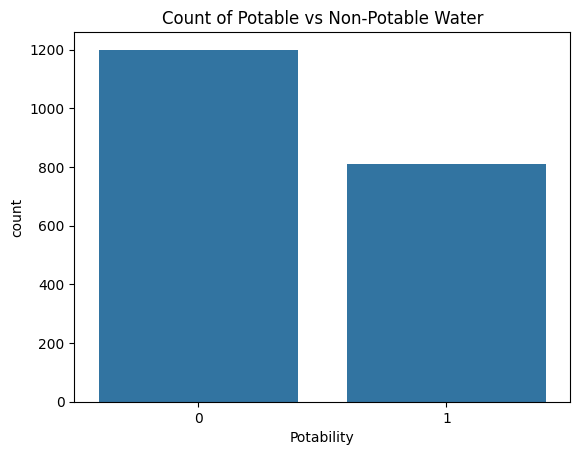

In [ ]:
sns.countplot(x='Potability', data=dataset)
plt.title('Count of Potable vs Non-Potable Water')
plt.show()

-->Printing the evaluation metrics: accuracy, confusion matrix, classification report,macro-averaged precision, macro-averaged recall, and silhouette score


In [ ]:
print(arr)
print(cm)
print(cr)
print(ps)
print(rs)
print(score)

0.6029776674937966
[[216  41]
 [119  27]]
              precision    recall  f1-score   support

           0       0.64      0.84      0.73       257
           1       0.40      0.18      0.25       146

    accuracy                           0.60       403
   macro avg       0.52      0.51      0.49       403
weighted avg       0.56      0.60      0.56       403

0.5209174714661984
0.512699216459677
0.026407297068394217


-->Importing GridSearchCV for hyperparameter tuning by exhaustive search over specified parameter values

In [ ]:
from sklearn.model_selection import GridSearchCV

-->Defining lists of hyperparameter values to tune: number of neighbors and algorithm types for KNN

In [ ]:
n_neighbors_value=[1,3,5,7,11]
algorithm=('auto', 'ball_tree', 'kd_tree', 'brute')

-->Defining a list of p-values (Minkowski distance parameters) to tune for the KNN algorithm

In [ ]:
p_value=[1,2,3,4,5]

-->Creating a dictionary of hyperparameters to pass to GridSearchCV for tuning the KNN model

In [ ]:
param=dict(n_neighbors=n_neighbors_value,algorithm=algorithm,p=p_value)

-->Initializing GridSearchCV to perform 5-fold cross-validation over the hyperparameter grid,using accuracy_score to evaluate model performance

In [ ]:
grid=GridSearchCV(model,param,scoring=accuracy_score,cv=5)

In [ ]:
grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 3, 5, 7, 11],
                         'p': [1, 2, 3, 4, 5]},
             scoring=<function accuracy_score at 0x7bfa1592bec0>)

-->Running GridSearchCV to find the best hyperparameters by fitting on the training data

In [ ]:
g=grid.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
  File "/usr/lib/python3.11/inspect.py", line 3121, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_vali

-->Displaying the best hyperparameters found by GridSearchCV

In [ ]:
g.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}

-->Displaying the best cross-validation accuracy score achieved during GridSearchCV

In [ ]:
g.best_score_

np.float64(nan)

-->Importing the pickle module to save and load Python objects

In [ ]:
import pickle

-->
Saving the trained model to a file named 'watermodel.pkl' using pickle for later use

In [ ]:
with open('watermodel.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Serialized to watermodel.pkl")

Serialized to watermodel.pkl
